Coefficients: 
 [0.27205835]
Mean squared error: 76.60
R^2 score: -0.31
Mean absolute error: 7.77
Median absolute error: 7.77


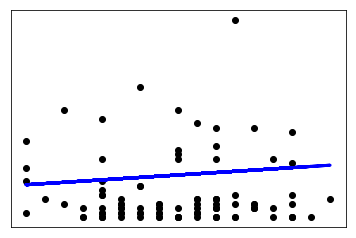

In [20]:
#Facebook Classification

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
import pandas as pd
import numpy as np

data = pd.read_csv("facebook_train.csv")
test = pd.read_csv("facebook_test.csv")

followers = data['total_followers']
paid = data['paid']
category = data['category']
months = data['month']
weekdays = data['weekday']
hours = data['hour']
comments = data['comment']

paid_t = test['paid']
months_t = test['month']
weekdays_t = test['weekday']
comments_t = test['comment']
category_t = test['category']

#Load datasets
i_v = np.array(paid+weekdays+months).reshape(-1,1) #training
i_v_t = np.array(paid_t+weekdays_t+months_t).reshape(-1,1) #test

# # Create linear regression object
regr = linear_model.LinearRegression()

# # # Train the model using the training sets
regr.fit(i_v, comments)

# Make predictions using the testing set
comments_pred = regr.predict(i_v_t)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(comments_t, comments_pred))
# Explained variance score: 1 is perfect prediction
print('R^2 score: %.2f' % r2_score(comments_t, comments_pred))
#Mean absolute error (MAS)
print("Mean absolute error: %.2f"
      % mean_absolute_error(comments_t, comments_pred))
#Median absolute error
print("Median absolute error: %.2f"
      % mean_absolute_error(comments_t, comments_pred))

# Plot outputs
plt.scatter(i_v_t, comments_t,  color='black')
plt.plot(i_v_t, comments_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [23]:
from numpy import array, argmax
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
label_encoder = LabelEncoder()

casualty = pd.read_csv("casualty_train.csv")
casualty = casualty.dropna()

severe= np.array(casualty['severe'])
severe = label_encoder.fit_transform(severe)

gender= np.array(casualty['gender'])
gender = label_encoder.fit_transform(gender)

age= np.array(casualty['age'])
age = label_encoder.fit_transform(age)

casualty_class= np.array(casualty['casualty_class'])
casualty_class=label_encoder.fit_transform(casualty_class)

travel= np.array(casualty['travel'])
travel = label_encoder.fit_transform(travel)

year= np.array(casualty['year'])
year = label_encoder.fit_transform(year)

pedestrian_location= np.array(casualty['pedestrian_location'])
pedestrian_location=label_encoder.fit_transform(pedestrian_location)

pedestrian_movement= np.array(casualty['pedestrian_movement'])
pedestrian_movement=label_encoder.fit_transform(pedestrian_movement)

variables = pd.DataFrame(age, gender)
variables

X_train, X_test, y_train, y_test = train_test_split(variables, severe, test_size=0.4, random_state=0)

clf = SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)     

0.8036292186777624

In [56]:
from numpy import array
from numpy import argmax
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
from sklearn.svm import SVC

casualty_t = pd.read_csv("casualty_test.csv")
casualty_t = casualty_t.dropna()

severe_t= np.array(casualty_t['severe'])
severe_t = label_encoder.fit_transform(severe_t)

gender_t= np.array(casualty_t['gender'])
gender_t = label_encoder.fit_transform(gender_t)

age_t= np.array(casualty_t['age'])
age_t = label_encoder.fit_transform(age_t)

casualty_class_t= np.array(casualty_t['casualty_class'])
casualty_class_t=label_encoder.fit_transform(casualty_class_t)

travel_t= np.array(casualty_t['travel'])
travel_t = label_encoder.fit_transform(travel_t)

year_t= np.array(casualty_t['year'])
year_t = label_encoder.fit_transform(year_t)

pedestrian_location_t= np.array(casualty_t['pedestrian_location'])
pedestrian_location_t=label_encoder.fit_transform(pedestrian_location_t)

pedestrian_movement_t= np.array(casualty_t['pedestrian_movement'])
pedestrian_movement_t=label_encoder.fit_transform(pedestrian_movement_t)

variables = pd.DataFrame(age, gender)
variables_t = pd.DataFrame(age_t, gender_t)

# clf = SVC(kernel='linear', C=1).fit(variables, severe)
clf = SVC(kernel='linear', C=1, probability = True)
clf.fit(variables, severe)  
severe_pred = clf.predict(variables_t)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.8034291010194624 0.0 0.0 0.49204789223051637 0.2601523878757533 0.19478781938579484 0.5785007072135785
(array([0.8034291, 0.       ]), array([1., 0.]), array([0.89100159, 0.        ]), array([8669, 2121]))


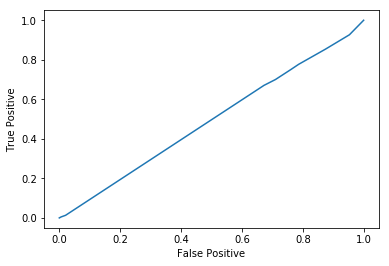

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve,average_precision_score, precision_recall_fscore_support

a_score = accuracy_score(severe_t, severe_pred, normalize=True)
p_score = precision_score(severe_t, severe_pred)
r_score = recall_score(severe_t, severe_pred)
#p_f = precision_recall_fscore_support(severe_t, severe_pred)

severe_scores = clf.predict_proba(variables_t)[:,1]

fpr, tpr, thresholds = roc_curve(severe_t, severe_scores)

r = roc_auc_score(severe_t, severe_scores)

plt.plot(fpr,tpr)

plt.xlabel('False Positive')
plt.ylabel('True Positive')

precision, recall, threshold_p = precision_recall_curve(severe_t, severe_scores)
av_r_score= np.mean(recall)
av_p_score= np.mean(precision)
av_p_score_2 = average_precision_score(severe_t, severe_scores)

print(a_score,p_score,r_score,r, av_p_score, av_p_score_2, av_r_score)
#Why do I get prediction is ill-defined
